# Chapter 12
http://allendowney.github.io/ThinkStats2/

## Reading

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/mj-clean.csv")

Downloaded mj-clean.csv


In [4]:
transactions = pd.read_csv("mj-clean.csv", parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [5]:
def GroupByDay(transactions, func=np.mean):
    """
    Groups transactions by day and computes the daily mean ppg.
    
    `transactions`: DataFrame of transactions
    
    returns: DataFrame of daily prices.
    """
    grouped = transactions[["date", "ppg"]].groupby("date")
    daily = grouped.aggregate(func)
    
    daily["date"] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, "Y")
    daily["years"] = (daily.date - start) / one_year
    
    return daily

In [6]:
def GroupByQualityAndDay(transactions):
    """
    Divides transactions into groups by quality and computes mean daily price.
    
    `transaction`: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby("quality")
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)
        
    return dailies

In [135]:
dailies = GroupByQualityAndDay(transactions)

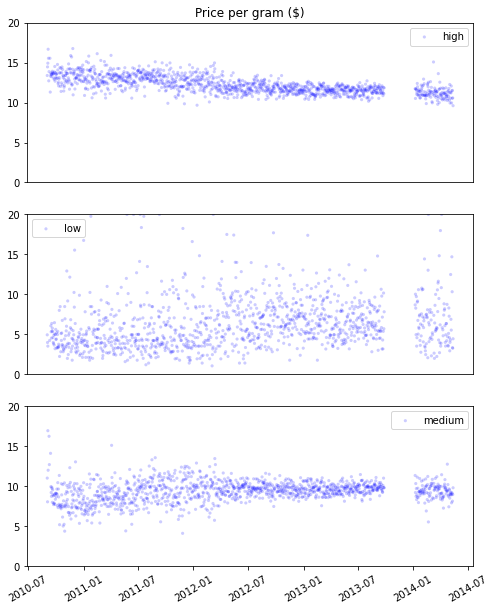

In [8]:
import matplotlib.pyplot as plt

thinkplot.PrePlot(rows=3)
for i, (name, daily) in enumerate(dailies.items()):
    thinkplot.SubPlot(i + 1)
    title = "Price per gram ($)" if i == 0 else ""
    thinkplot.Config(ylim=[0, 20], title=title)
    thinkplot.Scatter(daily.ppg, s=10, label=name)
    if i == 2:
        plt.xticks(rotation=30)
        thinkplot.Config()
    else:
        thinkplot.Config(xticks=[])

### Linear model of price as a function of time:

In [9]:
import statsmodels.formula.api as smf

def RunLinearModel(daily):
    model = smf.ols("ppg ~ years", data=daily)
    results = model.fit()
    return model, results

In [10]:
from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.69e-160
Time:                        20:28:14   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           2.76e-09
Time:                        20:28:14   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5683      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.82e-15
Time:                        20:28:14   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2832      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
def PlotFittedValues(model, results, label=""):
    """
    Plots original data and fitted values.
    
    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:, 1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label="model", color="#ff7f00")

In [13]:
def PlotLinearModel(daily, name):
    """Plots a linear fit to a sequence of prices, and the residuals.

    daily: DataFrame of daily prices
    name: string
    """
    model, results = RunLinearModel(daily)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(
        title="Fitted values",
        xlabel="Years",
        xlim=[-0.1, 3.8],
        ylabel="Price per gram ($)",
    )

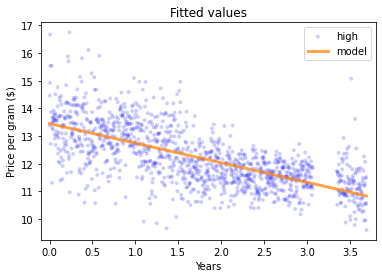

In [14]:
name = "high"
daily = dailies[name]

PlotLinearModel(daily, name)

### Rolling mean:

In [15]:
def PlotRollingMean(daily, name):
    """
    Plots rolling mean.
    
    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)
    
    thinkplot.Scatter(reindexed.ppg, s=15, alpha=0.2, label=name)
    roll_mean = pd.Series(reindexed.ppg).rolling(30).mean()
    thinkplot.Plot(roll_mean, label="rolling mean", color="#ff7f00")
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel="price per gram ($)")

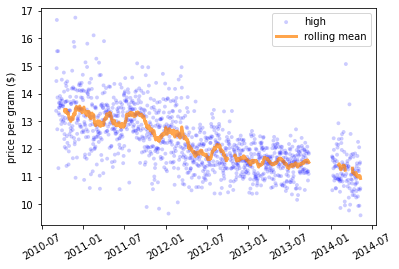

In [16]:
PlotRollingMean(daily, name)

### Exponentially-weighted moving average (EWMA)
Gives more weight to more recent points.

In [17]:
def PlotEWMA(daily, name):
    """
    Plots exponentially-weighted moving average.
    
    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)
    
    thinkplot.Scatter(reindexed.ppg, s=15, alpha=0.2, label=name)
    roll_mean = reindexed.ppg.ewm(30).mean()
    thinkplot.Plot(roll_mean, label="EWMA", color="#ff7f00")
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel="price per gram ($)")

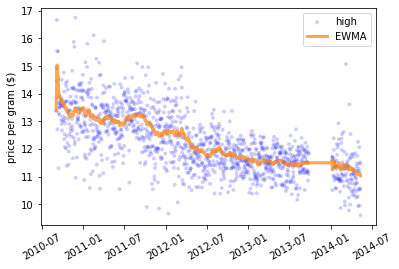

In [18]:
PlotEWMA(daily, name)

### Fill missing values with the right amount of noise

In [19]:
def FillMissing(daily, span=30):
    """
    Fills missing values with an exponentially-weighted moving average.
    Resulting DataFrame has new columns 'ewma' and 'resid'.
    
    daily: DataFrame of daily prices
    span: passed to ewma
    
    returns: DataFrame of daily prices.
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    ewma = pd.Series(reindexed.ppg).ewm(span=span).mean()
    
    resid = (reindexed.ppg - ewma).dropna()
    fake_data = ewma + thinkstats2.Resample(resid, len(reindexed))
    reindexed.ppg.fillna(fake_data, inplace=True)
    
    reindexed['ewma'] = ewma
    reindexed['resid'] = reindexed.ppg - ewma
    
    return reindexed

In [20]:
def PlotFilled(daily, name):
    """Plots the EWMA and filled data.

    daily: DataFrame of daily prices
    """
    filled = FillMissing(daily, span=30)
    thinkplot.Scatter(filled.ppg, s=15, alpha=0.2, label=name)
    thinkplot.Plot(filled.ewma, label="EWMA", color="#ff7f00")
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel="Price per gram ($)")

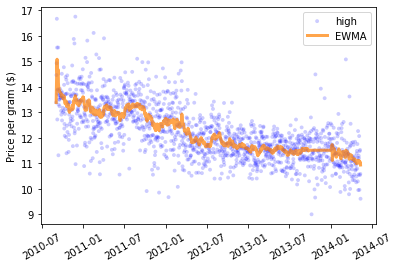

In [21]:
PlotFilled(daily, name)

### Serial correlation

In [27]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [28]:
filled_dailies = {}
for name, daily in dailies.items():
    filled_dailies[name] = FillMissing(daily, span=30)

In [29]:
for name, filled in filled_dailies.items():
    corr = thinkstats2.SerialCorr(filled.ppg, lag=1)
    print(name, corr)

high 0.4872874532363519
low 0.11138764033742084
medium 0.15463197108424082


In [30]:
for name, filled in filled_dailies.items():
    corr = thinkstats2.SerialCorr(filled.resid, lag=1)
    print(name, corr)

high -0.014115285091095673
low 0.04232401790676546
medium -0.02404572484487043


In [37]:
print('', end="\t")
for name, _ in filled_dailies.items():
    print(name, end="\t")
print('')
for lag in [1, 7, 30, 365]:
    print(lag, end="\t")
    for name, filled in filled_dailies.items():
        corr = SerialCorr(filled.resid, lag)
        print("%.2g" % corr, end="\t")
    print()

	high	low	medium	
1	-0.014	0.042	-0.024	
7	0.024	-0.012	-0.023	
30	-0.0098	-0.016	0.0037	
365	0.051	0.022	0.012	


### Autocorrelation

In [40]:
import statsmodels.tsa.stattools as smtsa

filled = filled_dailies["high"]
acf = smtsa.acf(filled.resid, nlags=365, adjusted=True, fft=False)

print("%0.2g, %.2g, %0.2g, %0.2g, %0.2g" % (acf[0], acf[1], acf[7], acf[30], acf[365]))

1, -0.014, 0.023, -0.0098, 0.049


In [51]:
def SimulateAutoCorrelation(daily, iters=1001, nlags=40):
    """
    Resample residuals, compute autocorrelation, and plot percentiles.
    
    daily: DataFrame of daily prices
    iters: number of simulations to run
    nlags; maximum lags to compute autocorrelation
    """
    t = []
    for _ in range(iters):
        filled = FillMissing(daily, span=30)
        resid = thinkstats2.Resample(filled.resid)
        acf = smtsa.acf(resid, nlags=nlags, adjusted=True, fft=False)[1:]
        t.append(np.abs(acf))
        
    high = thinkstats2.PercentileRows(t, [97.5])[0]
    low = -high
    lags = range(1, nlags+1)
    thinkplot.FillBetween(lags, low, high, alpha=0.2, color="gray")

In [52]:
def PlotAutoCorrelation(dailies, nlags=40, add_weekly=False):
    """Plots autocorrelation functions.

    dailies: map from category name to DataFrame of daily prices
    nlags: number of lags to compute
    add_weekly: boolean, whether to add a simulated weekly pattern
    """
    thinkplot.PrePlot(3)
    daily = dailies["high"]
    SimulateAutoCorrelation(daily)

    for name, daily in dailies.items():

        if add_weekly:
            daily.ppg = AddWeeklySeasonality(daily)

        filled = FillMissing(daily, span=30)

        acf = smtsa.acf(filled.resid, nlags=nlags, adjusted=True, fft=False)
        lags = np.arange(len(acf))
        thinkplot.Plot(lags[1:], acf[1:], label=name)

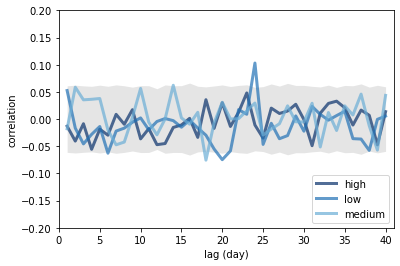

In [53]:
axis = [0, 41, -0.2, 0.2]

PlotAutoCorrelation(dailies, add_weekly=False)
thinkplot.Config(axis=axis, loc="lower right", ylabel="correlation", xlabel="lag (day)")

We don't observe any strong periodicity.

### Prediction:

In [54]:
def GenerateSimplePrediction(results, years):
    """
    Generates a simple prediction.
    
    results: results object
    years: sequence of times (in years) to make predictions for
    
    returns: sequence of predicted values
    """
    n = len(years)
    inter = np.ones(n)
    d = dict(Intercept=inter, years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    predict = results.predict(predict_df)
    return predict

In [55]:
def PlotSimplePrediction(results, years):
    predict = GenerateSimplePrediction(results, years)

    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label=name)
    thinkplot.plot(years, predict, color="#ff7f00")
    xlim = years[0] - 0.1, years[-1] + 0.1
    thinkplot.Config(
        title="Predictions",
        xlabel="Years",
        xlim=xlim,
        ylabel="Price per gram ($)",
        loc="upper right",
    )

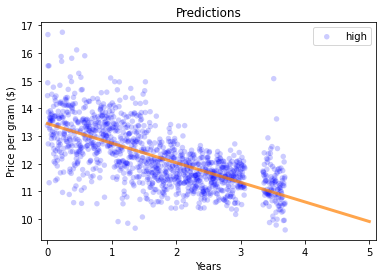

In [56]:
name = "high"
daily = dailies[name]

_, results = RunLinearModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

Quantify uncertainty in the prediction by resampling the residuals to generate fake datasets and fit the model to each fake dataset.

In [62]:
def SimulateResults(daily, iters=101, func=RunLinearModel):
    """
    Run simulations based on resampling residuals.
    
    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data
    
    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()
    
    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)
        
    return result_seq

To generate predictions, we take the list of results and make predictions.

If `add_resid` is true, we add resampled residuals to the predicted values, which generates predictions that include *predictive uncertainty* due to random noise, as well as *modeling uncertainty* due to random sampling.

In [59]:
def GeneratePredictions(result_seq, years, add_resid=False):
    """
    Generates an array of predicted values from a list of model results.
    
    When add_resid is False, predictions represent sampling error only.
    
    When add_resid is True, predictions include residual error.
    
    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean
    
    returns: sequence of predictions.
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    
    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)
        
    return predict_seq

In [60]:
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color="gray")

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color="gray")

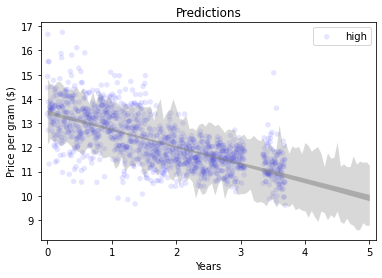

In [63]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

How much past data should we use to build the model?

In [67]:
def SimulateIntervals(daily, iters=101, func=RunLinearModel):
    """
    Run simulations based on different subsets of the data.
    
    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data
    
    returns: list of result objects.
    """
    result_seq = []
    starts = np.linspace(0, len(daily), iters).astype(int)
    
    for start in starts[:-2]:
        subset = daily[start:]
        _, results = func(subset)
        fake = subset.copy()
        
        for _ in range(iters):
            fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
            _, fake_results = func(fake)
            result_seq.append(fake_results)
            
    return result_seq

In [68]:
def PlotIntervals(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions based on different intervals.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateIntervals(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.2, color="gray")

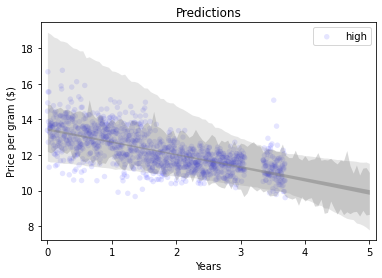

In [69]:
name = "high"
daily = dailies[name]

thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotIntervals(daily, years)
PlotPredictions(daily, years)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

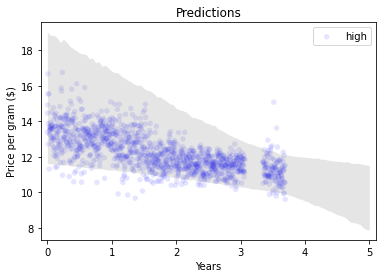

In [70]:
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotIntervals(daily, years)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

## Exercises

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [84]:
def RunLinearModelQuadratic(daily):
    daily['years2'] = np.array(daily['years'])**2
    model = smf.ols("ppg ~ years + years2", data=daily)
    results = model.fit()
    return model, results

In [80]:
for name, daily in dailies.items():
    model, results = RunLinearModelQuadratic(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.57e-164
Time:                        21:45:22   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     22.86
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.83e-10
Time:                        21:45:22   Log-Likelihood:                -3086.5
No. Observations:                1179   AIC:                             6179.
Df Residuals:                    1176   BIC:                             6194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7050      0.287     16.393      0.000       4.142       5.268
years          1.6329      0.357      4.573      0.000       0.932       2.334
years2        -0.2937      0.095     -3.091      0.002      -0.480      -0.107
==============================================================================
Omnibus:                      661.159   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.787
Skew:                           2.415   Prob(JB):                         0.00
Kurtosis:                      13.651   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     57.33
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.55e-24
Time:                        21:45:22   Log-Likelihood:                -2030.6
No. Observations:                1238   AIC:                             4067.
Df Residuals:                    1235   BIC:                             4083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3509      0.104     80.512      0.000       8.147       8.554
years          1.1472      0.130      8.806      0.000       0.892       1.403
years2        -0.2386      0.035     -6.878      0.000      -0.307      -0.171
==============================================================================
Omnibus:                      194.417   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.295
Skew:                           0.585   Prob(JB):                    1.20e-244
Kurtosis:                       7.517   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

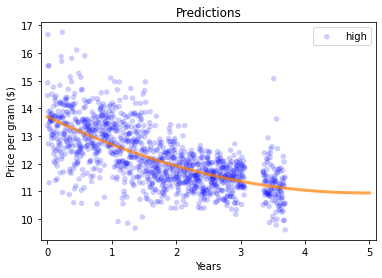

In [81]:
name = "high"
daily = dailies[name]

_, results = RunLinearModelQuadratic(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

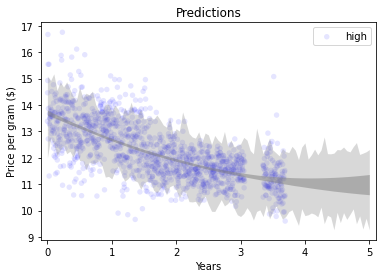

In [82]:
name = "high"
daily = dailies[name]

thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunLinearModelQuadratic)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [144]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    
    def TestStatistic(self, data):
        """
        data: a series and a lag
        returns: serial correlation of the series with the given lag
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat
    
    def RunModel(self):
        """
        Simulates null hypothesis by permutation.
        """
        series, lag = self.data
        permuted = series.reindex(np.random.permutation(series.copy().index))
        return permuted, lag

In [146]:
name = "high"
daily = dailies[name]

ht = SerialCorrelationTest(data=(daily.ppg, 1))
ht.PValue()

0.0

In [152]:
_, results = RunLinearModel(daily)
daily['linear_model'] = results.fittedvalues
daily['linear_resid'] = daily['ppg'] - daily['linear_model']

_, results = RunLinearModelQuadratic(daily)
daily['quadratic_model'] = results.fittedvalues
daily['quadratic_resid'] = daily['ppg'] - daily['quadratic_model']

In [153]:
ht = SerialCorrelationTest(data=(daily.linear_resid, 1))
ht.PValue()

0.064

In [154]:
ht = SerialCorrelationTest(data=(daily.quadratic_resid, 1))
ht.PValue()

0.046

**Bonus Example:** There are several ways to extend the EWMA model to generate predictions. One of the simplest is something like this:

1. Compute the EWMA of the time series and use the last point as an intercept, `inter`.

2. Compute the EWMA of differences between successive elements in the time series and use the last point as a slope, `slope`.

3. To predict values at future times, compute `inter + slope * dt`, where `dt` is the difference between the time of the prediction and the time of the last observation.


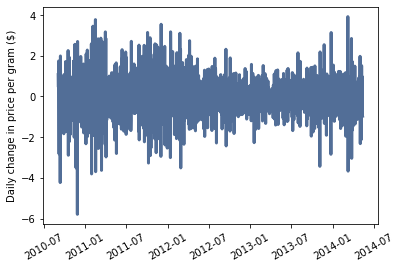

In [158]:
name = "high"
daily = dailies[name]

filled = FillMissing(daily)
diffs = filled.ppg.diff()

thinkplot.plot(diffs)
plt.xticks(rotation=30)
thinkplot.Config(ylabel="Daily change in price per gram ($)")

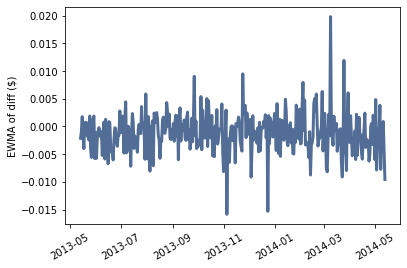

In [159]:
filled["slope"] = diffs.ewm(span=365).mean()
thinkplot.plot(filled.slope[-365:])
plt.xticks(rotation=30)
thinkplot.Config(ylabel="EWMA of diff ($)")

In [160]:
# extract the last inter and the mean of the last 30 slopes
start = filled.index[-1]
inter = filled.ewma[-1]
slope = filled.slope[-30:].mean()

start, inter, slope

(Timestamp('2014-05-13 00:00:00', freq='D'),
 10.929518765455489,
 -0.0024299864819239568)

In [161]:
# reindex the DataFrame, adding a year to the end
dates = pd.date_range(filled.index.min(), filled.index.max() + np.timedelta64(365, "D"))
predicted = filled.reindex(dates)

In [163]:
predicted.tail()

,ppg,date,years,years2,linear_model,linear_resid,quadratic_model,quadratic_resid,ewma,resid,slope
2015-05-09,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-11,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-12,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-13,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# generate predicted values and add them to the end
predicted["date"] = predicted.index
one_day = np.timedelta64(1, "D")
predicted["days"] = (predicted.date - start) / one_day
predict = inter + slope * predicted.days
predicted.ewma.fillna(predict, inplace=True)

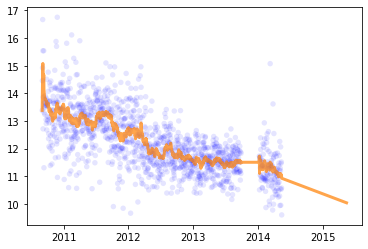

In [165]:
# plot the actual values and predictions
thinkplot.Scatter(daily.ppg, alpha=0.1, label=name)
thinkplot.Plot(predicted.ewma, color="#ff7f00")

In [166]:
def PlotEWMAPrediction(name):

    daily = dailies[name]

    filled = FillMissing(daily)
    diffs = filled.ppg.diff()
    filled["slope"] = diffs.ewm(span=365).mean()

    # extract the last inter and the mean of the last 30 slopes
    start = filled.index[-1]
    inter = filled.ewma[-1]
    slope = filled.slope[-30:].mean()

    dates = pd.date_range(filled.index.min(), filled.index.max() + np.timedelta64(365, "D"))
    predicted = filled.reindex(dates)
    predicted["date"] = predicted.index
    one_day = np.timedelta64(1, "D")
    predicted["days"] = (predicted.date - start) / one_day
    predict = inter + slope * predicted.days
    predicted.ewma.fillna(predict, inplace=True)
    
    thinkplot.Scatter(daily.ppg, alpha=0.1, label=name)
    thinkplot.Plot(predicted.ewma, color="#ff7f00")

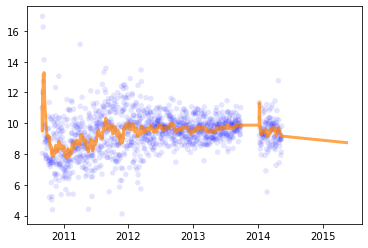

In [167]:
PlotEWMAPrediction('medium')

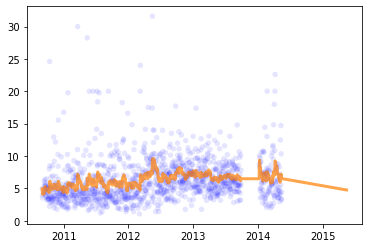

In [168]:
PlotEWMAPrediction('low')